Implement time series forecasting for the NIFTY-50 dataset. Design and train a model to predict future values of the NIFTY-50 stock market index based on historical data.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

data = pd.read_csv("nifty.csv", index_col="Date", parse_dates=True)

# Normalize numerical columns
scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close']])

# Ensure data is not shuffled while splitting ⚠️⚠️⚠️
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

model = tf.keras.Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(loss='mse', optimizer='adam')

model.fit(train_data[['Open', 'High', 'Low', 'Close']], train_data['Close'], epochs=70)

Epoch 1/70
148/148 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 2/70
148/148 [==============================] - 0s 2ms/step - loss: 2.5659e-06
Epoch 3/70
148/148 [==============================] - 0s 3ms/step - loss: 2.4624e-06
Epoch 4/70
148/148 [==============================] - 0s 2ms/step - loss: 2.4340e-06
Epoch 5/70
148/148 [==============================] - 0s 1ms/step - loss: 2.5055e-06
Epoch 6/70
148/148 [==============================] - 0s 1ms/step - loss: 2.6539e-06
Epoch 7/70
148/148 [==============================] - 0s 1ms/step - loss: 2.3421e-06
Epoch 8/70
148/148 [==============================] - 0s 1ms/step - loss: 2.2998e-06
Epoch 9/70
148/148 [==============================] - 0s 1ms/step - loss: 2.2048e-06
Epoch 10/70
148/148 [==============================] - 0s 1ms/step - loss: 2.2726e-06
Epoch 11/70
148/148 [==============================] - 0s 1ms/step - loss: 2.1517e-06
Epoch 12/70
148/148 [==============================] - 0s 1ms/step 

37/37 [==============================] - 0s 852us/step


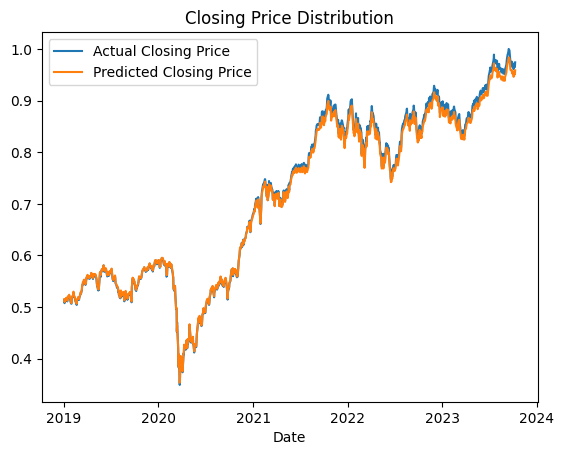



Mean Absolute Error : 0.00581


In [ ]:
predicted_closing_prices = model.predict(test_data[['Open', 'High', 'Low', 'Close']])

# Visualize actual and predicted closing prices
plt.plot(test_data.index, test_data['Close'], label='Actual Closing Price')
plt.plot(test_data.index, predicted_closing_prices, label='Predicted Closing Price')
plt.title("Closing Price Distribution")
plt.xlabel("Date")
plt.legend()
plt.show()

mae = mean_absolute_error(test_data['Close'], predicted_closing_prices)
print(f"\n\nMean Absolute Error : {round(mae, 5)}")